# Penerapan Data Mining untuk Meningkatkan Efektivitas Kampanye Pemasaran Perbankan (Studi Kasus: Dataset Bank Marketing UCI)

# Data Understanding

Dataset ini berasal dari kampanye pemasaran langsung (telemarketing) yang dilakukan oleh sebuah lembaga perbankan di Portugal. Tujuan utama dari pengumpulan data ini adalah untuk menganalisis dan memprediksi faktor-faktor apa saja yang memengaruhi seorang klien untuk berlangganan deposito berjangka (term deposit).

Setiap baris data mewakili satu klien yang dihubungi. Data ini mencakup tiga kelompok informasi utama:

- Data demografis klien, seperti umur, pekerjaan, dan status pernikahan.
- Informasi terkait kontak terakhir dalam kampanye yang sedang berjalan, seperti durasi panggilan dan bulan kontak.
- Riwayat interaksi klien dengan kampanye-kampanye sebelumnya.

Tujuan akhirnya adalah untuk membangun model prediksi yang dapat mengklasifikasikan apakah seorang klien akan mengatakan "yes" atau "no" terhadap penawaran deposito berjangka, sehingga kampanye pemasaran di masa depan bisa lebih efektif dan efisien.

Tujuan akhirnya adalah untuk membangun model prediksi yang dapat mengklasifikasikan apakah seorang klien akan mengatakan "yes" atau "no" terhadap penawaran deposito berjangka, sehingga kampanye pemasaran di masa depan bisa lebih efektif dan efisien.

In [4]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi seaborn
sns.set_style("whitegrid")

# Memuat dataset dari file CSV
df = pd.read_csv('./bank+marketing/bank/bank-full.csv', sep=';')

**1. Visualisasi Distribusi Fitur Numerik (Histogram)**  
Visualisasi ini digunakan untuk memahami sebaran atau distribusi dari setiap fitur yang berbentuk angka (numerik). Dari histogram, kita bisa melihat apakah data cenderung berkumpul di nilai tertentu, apakah distribusinya miring (skewed), atau apakah ada nilai-nilai ekstrem (outlier).

Membuat Histogram untuk Fitur Numerik...


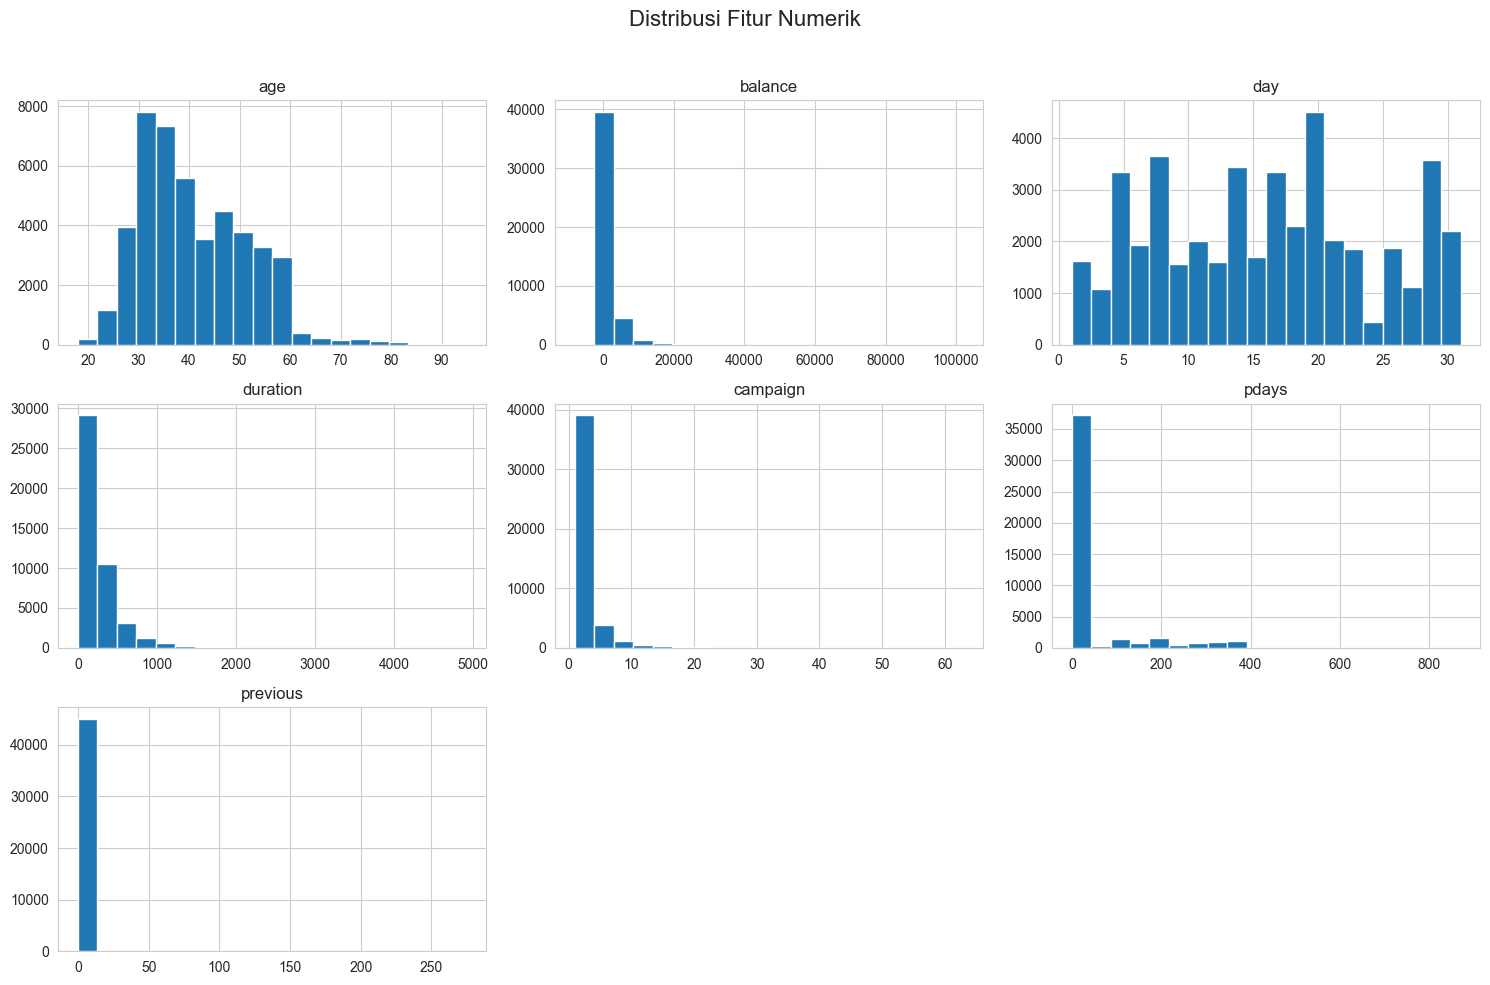

In [5]:
# --- Kode untuk Histogram Fitur Numerik ---
print("Membuat Histogram untuk Fitur Numerik...")

# Memilih kolom-kolom yang bertipe data numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat histogram untuk setiap fitur numerik
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(3, 3))

# Menambahkan judul utama untuk semua plot
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Menampilkan visualisasi
plt.show()

**2. Visualisasi Distribusi Fitur Kategorikal (Bar Plot)**  
Visualisasi ini bertujuan untuk menghitung dan membandingkan jumlah data di setiap kategori pada fitur non-numerik (seperti 'job', 'marital', 'education'). Ini sangat berguna untuk melihat kategori mana yang paling umum dan mengidentifikasi ketidakseimbangan data.

Kode Program:


Membuat Bar Plot untuk Fitur Kategorikal...


C:\Users\Tuhu Pangestu\AppData\Local\Temp\ipykernel_17360\2124029847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
C:\Users\Tuhu Pangestu\AppData\Local\Temp\ipykernel_17360\2124029847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
C:\Users\Tuhu Pangestu\AppData\Local\Temp\ipykernel_17360\2124029847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].val

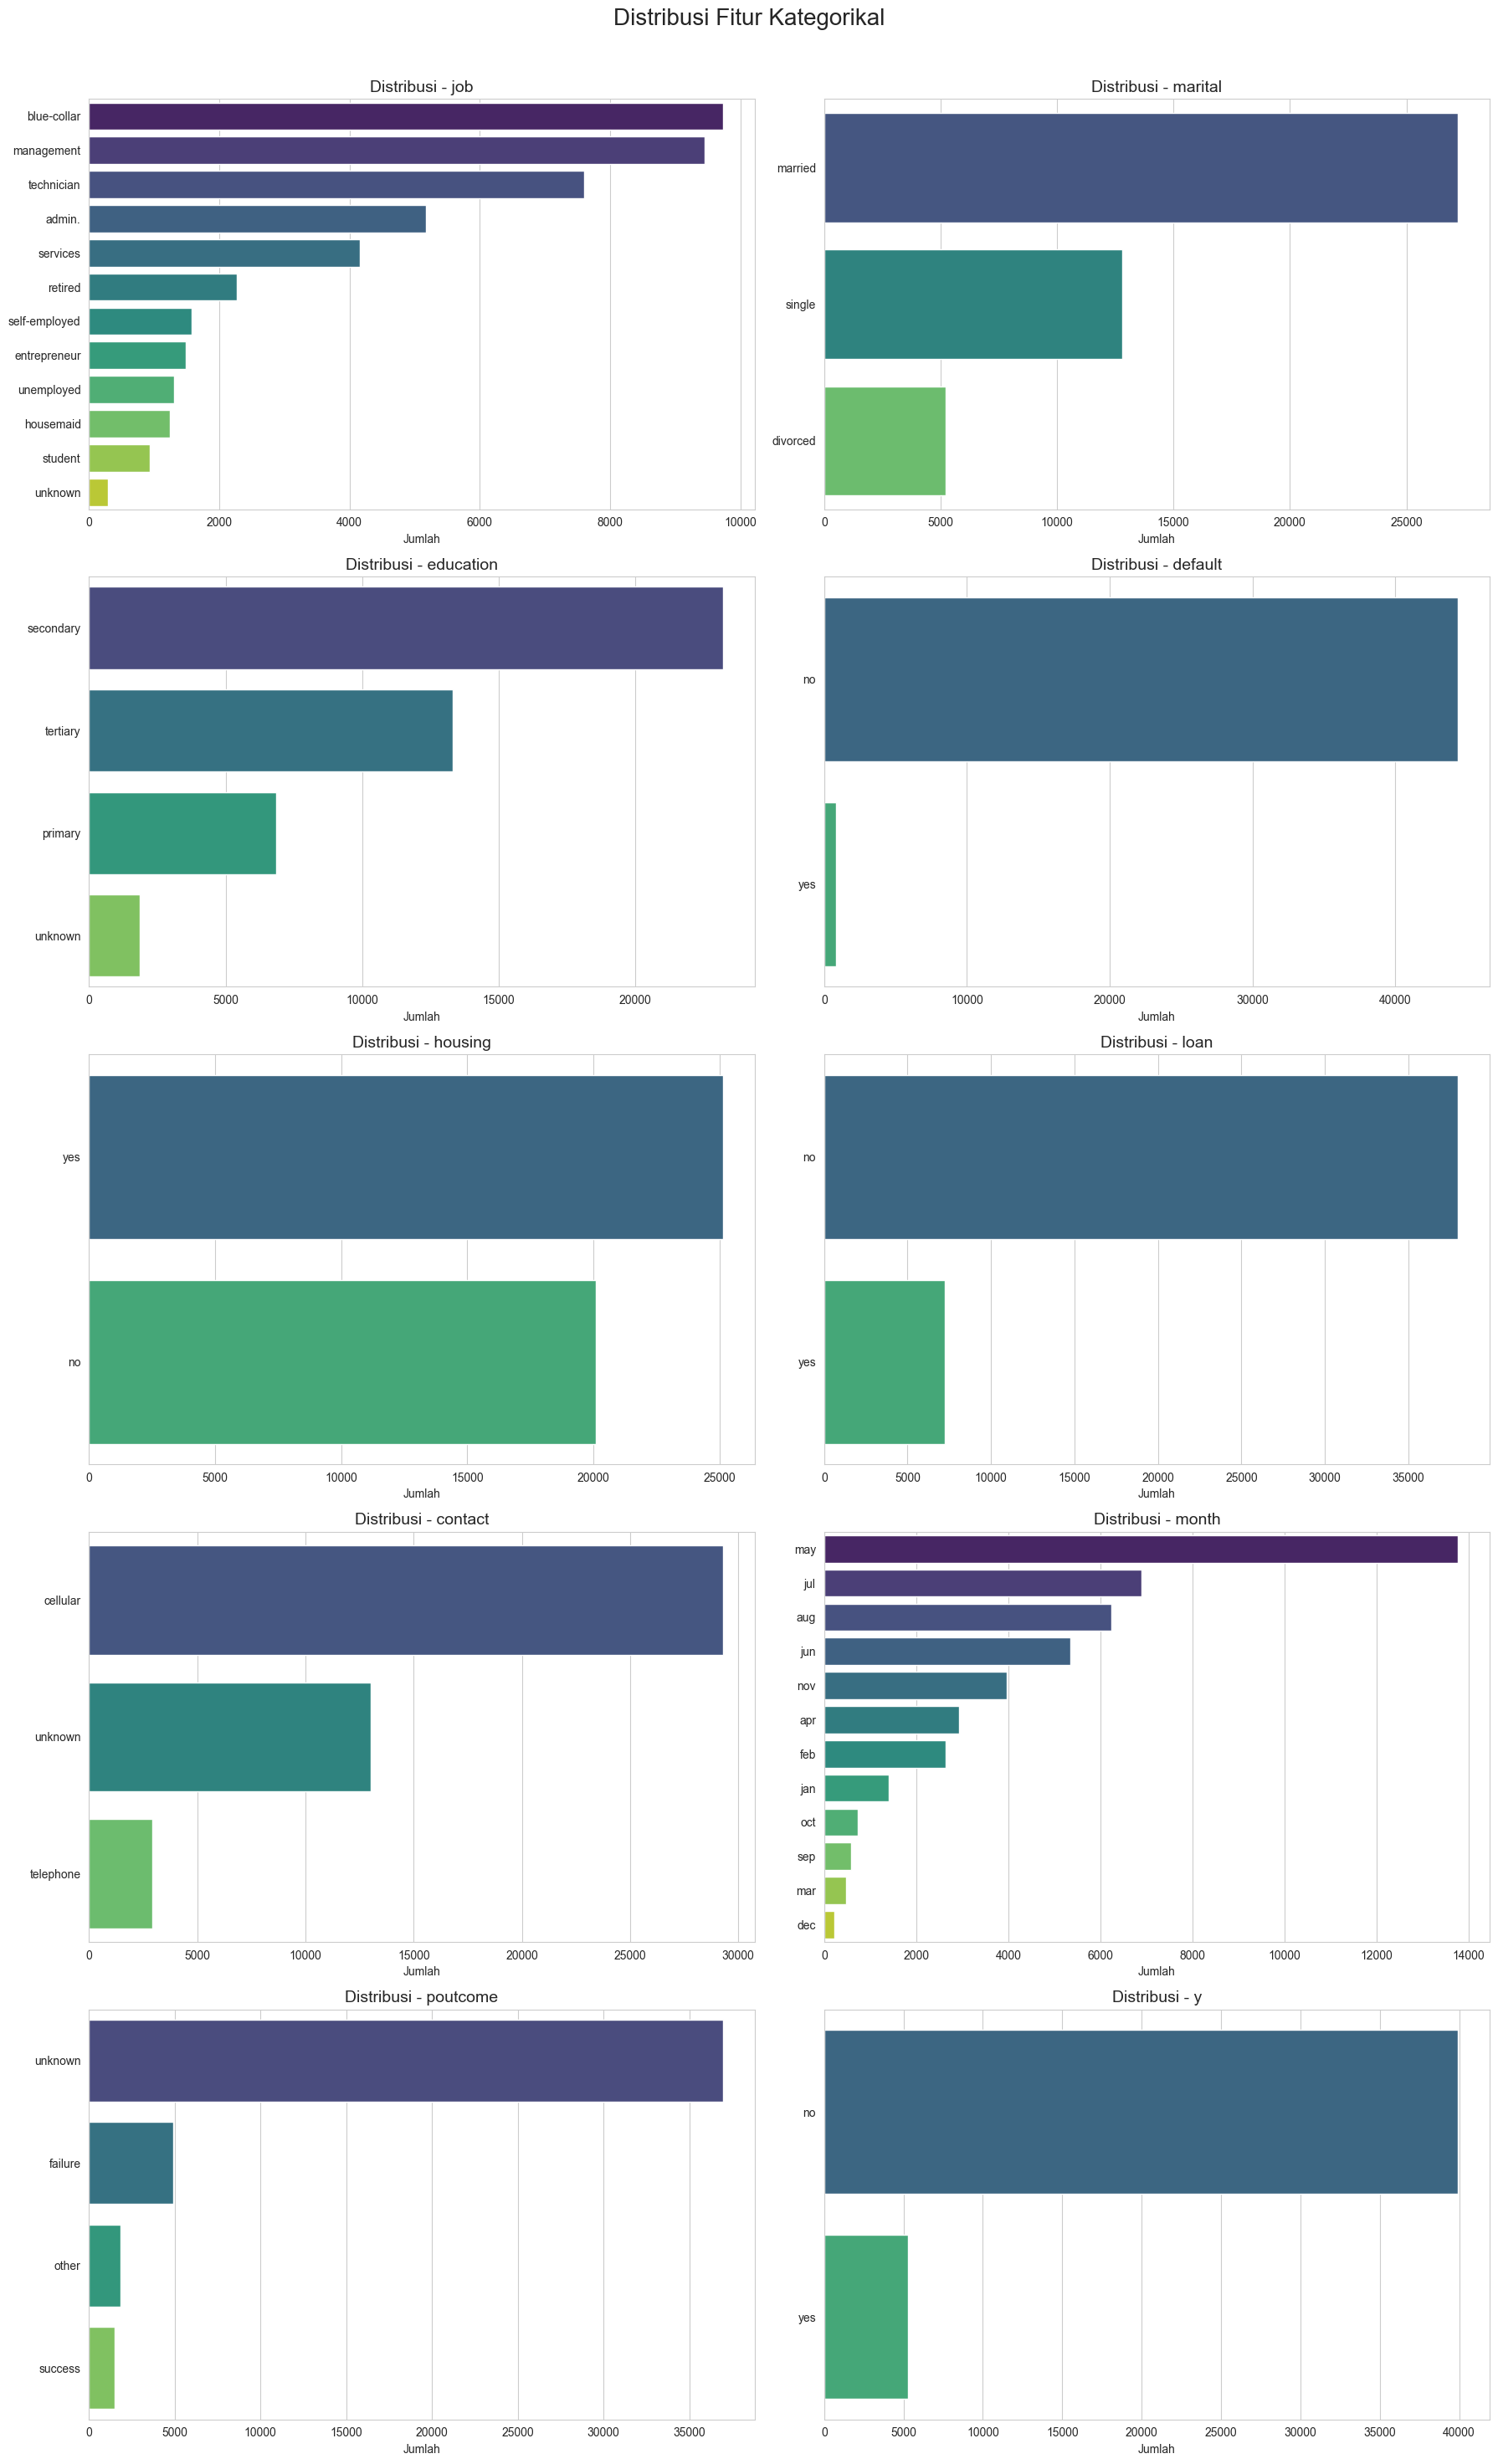

In [6]:
# --- Kode untuk Bar Plot Fitur Kategorikal ---
print("\nMembuat Bar Plot untuk Fitur Kategorikal...")

# Memilih kolom-kolom yang bertipe data object (teks/kategorikal)
categorical_features = df.select_dtypes(include=['object']).columns

# Membuat figure besar untuk menampung semua plot
plt.figure(figsize=(18, 30))
plt.suptitle('Distribusi Fitur Kategorikal', fontsize=20)

# Looping untuk membuat plot bagi setiap fitur kategorikal
for i, col in enumerate(categorical_features):
    # Membuat subplot dalam grid 5 baris x 2 kolom, di posisi ke-(i+1)
    plt.subplot(5, 2, i + 1)
    
    # Membuat bar plot horizontal menggunakan seaborn
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    
    # Memberi judul pada setiap subplot
    plt.title(f'Distribusi - {col}', fontsize=14)
    plt.xlabel('Jumlah')
    plt.ylabel('') # Menghilangkan label y karena sudah jelas dari judul

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**3. Matriks Korelasi (Heatmap)**  
Heatmap korelasi digunakan untuk memvisualisasikan hubungan linear antara setiap pasang fitur numerik. Ini membantu kita dengan cepat mengidentifikasi fitur mana yang mungkin saling terkait kuat.


Membuat Heatmap Korelasi...


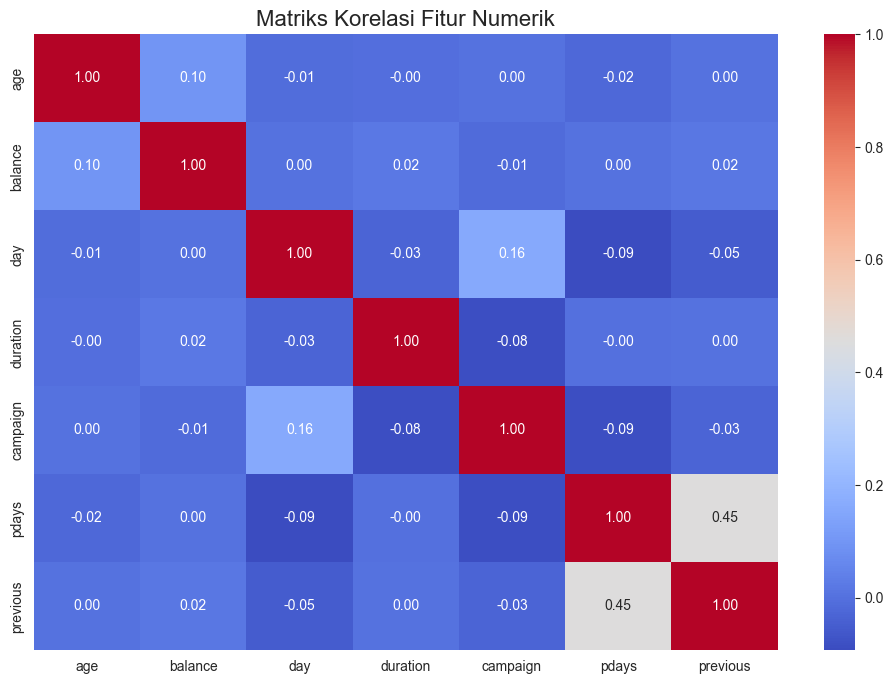

In [7]:
# --- Kode untuk Heatmap Korelasi ---
print("\nMembuat Heatmap Korelasi...")

# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(12, 8))

# 1. Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# 2. Membuat heatmap menggunakan Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# 3. Memberi judul
plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)

# 4. Menampilkan plot
plt.show()

# Pre-Processing Data

In [2]:
# -*- coding: utf-8 -*-
"""
Kode untuk Preprocessing Dataset Bank Marketing (bank-full.csv)
"""

# 1. Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("Library yang dibutuhkan telah di-import.")

# 2. Muat Dataset
# Pastikan file 'bank-full.csv' berada di direktori yang sama.
try:
    df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
    print("\nDataset 'bank-full.csv' berhasil dimuat.")
    print(f"Bentuk data awal: {df.shape}")
except FileNotFoundError:
    print("Error: File 'bank-full.csv' tidak ditemukan.")
    exit()

# 3. Pra-pemrosesan Variabel Target (y)
# Mengubah 'yes' menjadi 1 dan 'no' menjadi 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})
print("\nVariabel target 'y' telah diubah menjadi format biner (1/0).")

# 4. Memisahkan Fitur (X) dan Target (y)
X = df.drop('y', axis=1)
y = df['y']

# 5. Mengidentifikasi Tipe Kolom
# Memisahkan nama kolom berdasarkan tipe datanya (numerik atau kategorikal/object)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f"\nJumlah fitur numerik: {len(numerical_features)}")
print(f"Jumlah fitur kategorikal: {len(categorical_features)}")

# 6. Membuat Pipeline untuk Preprocessing
# Pipeline ini akan menerapkan transformasi yang berbeda pada tipe kolom yang berbeda.

# Pipeline untuk fitur numerik: hanya scaling
numeric_transformer = StandardScaler()

# Pipeline untuk fitur kategorikal: One-Hot Encoding
# handle_unknown='ignore' berguna jika saat pengujian ada kategori yang tidak ada di data latih
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Menggabungkan kedua transformer menggunakan ColumnTransformer
# Ini akan menerapkan transformer yang tepat ke kolom yang tepat
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 7. Membagi Data menjadi Data Latih dan Data Uji
# Data dibagi sebelum menerapkan preprocessing untuk mencegah kebocoran data dari set uji ke set latih
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset telah dibagi menjadi data latih (80%) dan data uji (20%).")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")

# 8. Menerapkan Preprocessing pada Data
# FITTING preprocessor HANYA pada data latih (X_train)
# TRANSFORM diterapkan pada data latih dan data uji
print("\nMenerapkan proses scaling dan one-hot encoding...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nProses preprocessing selesai.")
print(f"Bentuk X_train setelah diproses: {X_train_processed.shape}")
print(f"Bentuk X_test setelah diproses: {X_test_processed.shape}")
print("\nData siap digunakan untuk melatih model machine learning.")

# Menampilkan contoh hasil data yang telah diproses (opsional)
# Hasilnya adalah sparse matrix atau numpy array, bukan dataframe pandas lagi.
# print("\nContoh 5 baris pertama dari data latih yang telah diproses:")
# print(X_train_processed[:5])

Library yang dibutuhkan telah di-import.

Dataset 'bank-full.csv' berhasil dimuat.
Bentuk data awal: (45211, 17)

Variabel target 'y' telah diubah menjadi format biner (1/0).

Jumlah fitur numerik: 7
Jumlah fitur kategorikal: 9

Dataset telah dibagi menjadi data latih (80%) dan data uji (20%).
Bentuk X_train: (36168, 16)
Bentuk X_test: (9043, 16)

Menerapkan proses scaling dan one-hot encoding...

Proses preprocessing selesai.
Bentuk X_train setelah diproses: (36168, 51)
Bentuk X_test setelah diproses: (9043, 51)

Data siap digunakan untuk melatih model machine learning.


## Deteksi missing value pada data

In [3]:
# Import library pandas
import pandas as pd

# Muat dataset 'bank-full.csv'
try:
    df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
    print("Dataset 'bank-full.csv' berhasil dimuat.\n")
except FileNotFoundError:
    print("Error: File 'bank-full.csv' tidak ditemukan.")
    exit()

# Menghitung jumlah missing value di setiap kolom
missing_values = df.isnull().sum()

print("--- Analisis Missing Value ---")
print("Jumlah nilai yang hilang (missing) per kolom:")
print(missing_values)

# Mengecek apakah ada missing value di seluruh dataset
total_missing = missing_values.sum()
if total_missing == 0:
    print("\nKesimpulan: Tidak ada missing value dalam dataset ini.")
else:
    print(f"\nTotal missing value dalam dataset: {total_missing}")

Dataset 'bank-full.csv' berhasil dimuat.

--- Analisis Missing Value ---
Jumlah nilai yang hilang (missing) per kolom:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Kesimpulan: Tidak ada missing value dalam dataset ini.


## Deteksi outlier pada data

In [4]:
print("\n--- Analisis Outlier Secara Statistik ---")
print("Statistik Deskriptif untuk Fitur Numerik:")
print(df.describe())


--- Analisis Outlier Secara Statistik ---
Statistik Deskriptif untuk Fitur Numerik:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.0


--- Analisis Outlier Secara Visual (Box Plot) ---


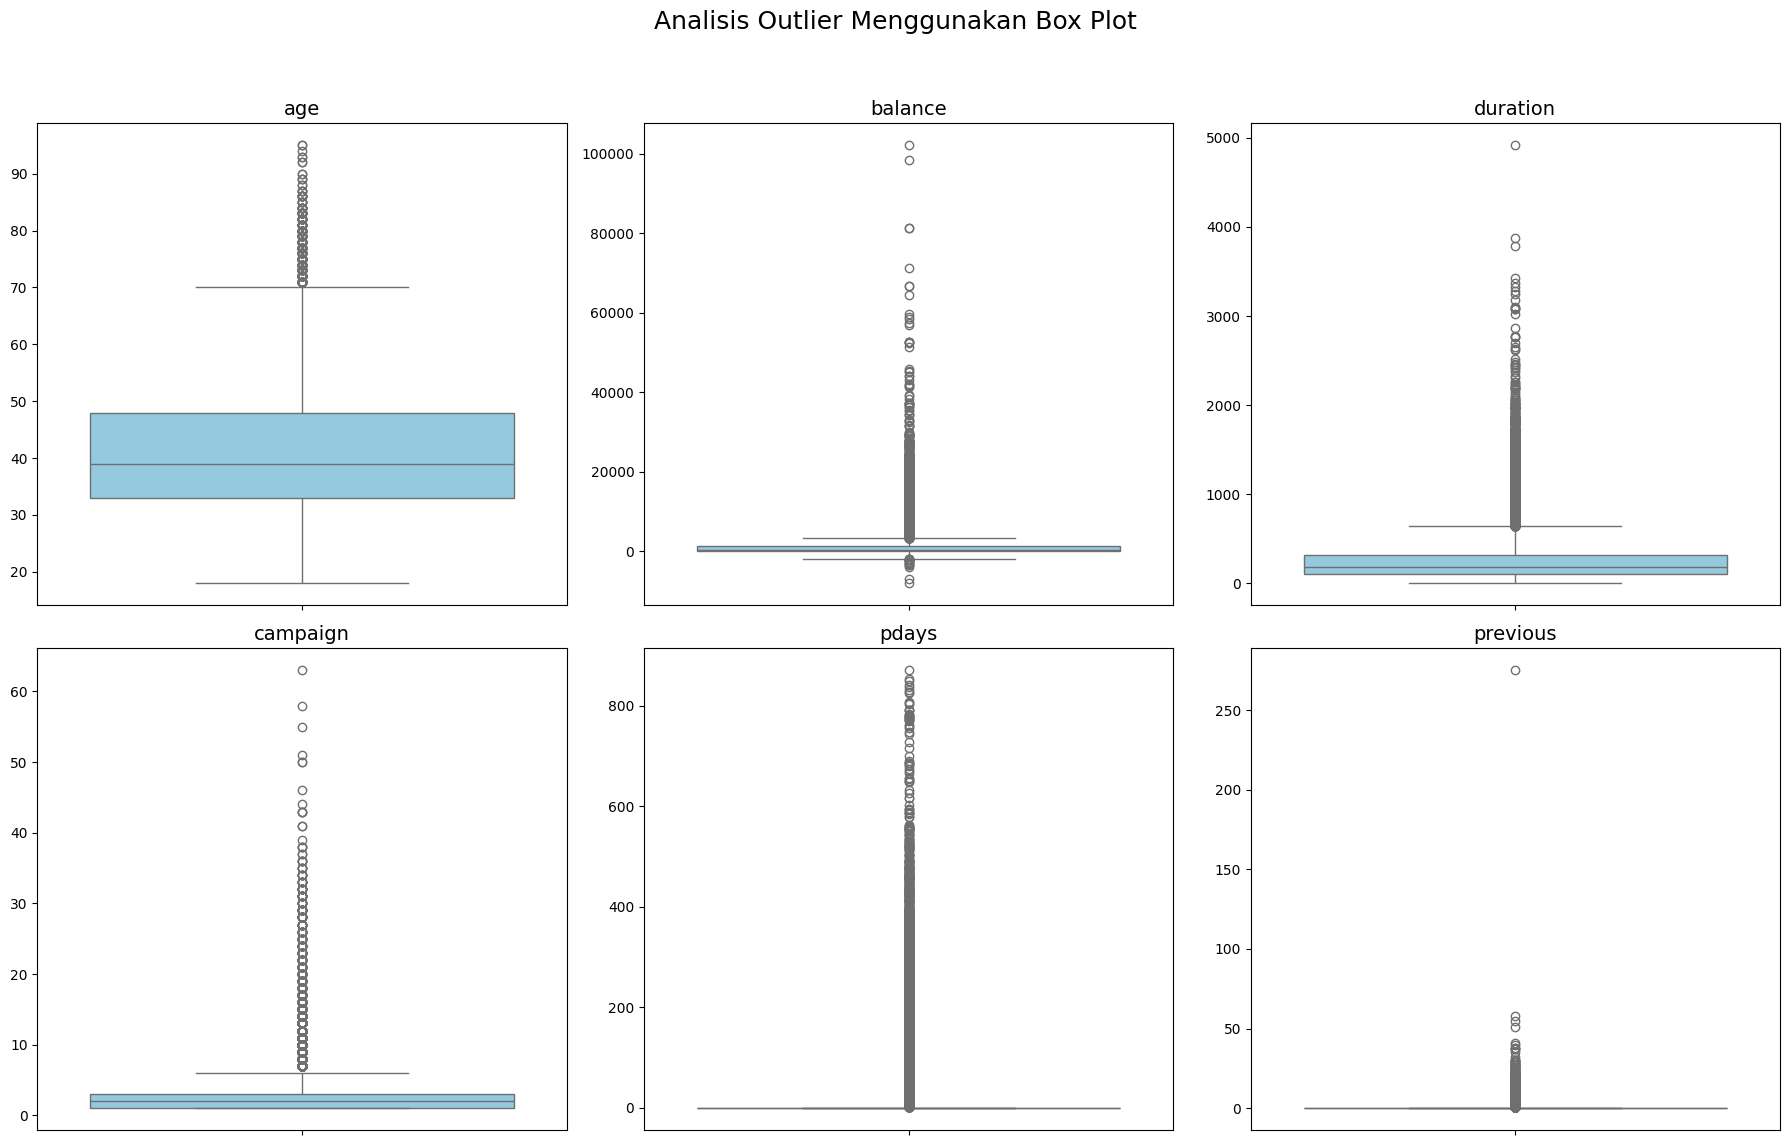

In [5]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Analisis Outlier Secara Visual (Box Plot) ---")

# Memilih fitur numerik yang relevan untuk dianalisis outlier-nya
numerical_features_for_outliers = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Membuat kanvas untuk plot
plt.figure(figsize=(18, 12))
plt.suptitle('Analisis Outlier Menggunakan Box Plot', fontsize=18)

# Membuat box plot untuk setiap fitur
for i, col in enumerate(numerical_features_for_outliers):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col, fontsize=14)
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [1]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np

print("Memulai proses: Memuat data, membersihkan outlier, dan menyimpan...")

# 2. Muat dataset asli
try:
    df = pd.read_csv('bank+marketing/bank/bank-full.csv', sep=';')
    print(f"Dataset asli 'bank-full.csv' berhasil dimuat. Bentuk awal: {df.shape}")
except FileNotFoundError:
    print("GAGAL: Pastikan file 'bank-full.csv' berada di direktori yang sama.")
    exit() # Hentikan eksekusi jika file tidak ditemukan

# 3. Proses Penghapusan Outlier
# Pilih kolom numerik yang akan dibersihkan
columns_to_clean = ['age', 'balance', 'duration', 'campaign', 'previous']

# Buat salinan dataframe untuk menjaga data asli
df_no_outliers = df.copy()

print("\nMembersihkan outlier menggunakan metode IQR...")
# Looping untuk setiap kolom yang akan dibersihkan
for column in columns_to_clean:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data untuk menghapus outlier
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print(f"Proses pembersihan selesai. Bentuk data baru: {df_no_outliers.shape}")

# 4. Proses Penyimpanan Data
# Langkah ini dijalankan setelah df_no_outliers selesai dibuat
try:
    # Menyimpan dataframe yang sudah bersih ke file CSV baru
    # index=False agar nomor indeks tidak ikut disimpan sebagai kolom baru
    df_no_outliers.to_csv('bank-full_no_outliers.csv', index=False, sep=';')
    
    print("\nPROSES BERHASIL!")
    print("Dataset yang telah dibersihkan dari outlier telah disimpan dengan nama file: bank-full_no_outliers.csv")

except Exception as e:
    print(f"\nGAGAL: Terjadi kesalahan saat mencoba menyimpan file: {e}")

Memulai proses: Memuat data, membersihkan outlier, dan menyimpan...
Dataset asli 'bank-full.csv' berhasil dimuat. Bentuk awal: (45211, 17)

Membersihkan outlier menggunakan metode IQR...
Proses pembersihan selesai. Bentuk data baru: (28069, 17)

PROSES BERHASIL!
Dataset yang telah dibersihkan dari outlier telah disimpan dengan nama file: bank-full_no_outliers.csv


# Data Modeling

Memulai proses: Memuat data, preprocessing, dan modeling...

Dataset 'bank-full_no_outliers.csv' berhasil dimuat.
Bentuk data: (28069, 17)

Variabel target 'y' telah diubah menjadi format biner (1/0).

Dataset telah dibagi: 70% data latih, 30% data uji.
Preprocessing (Scaling dan Encoding) selesai.

--- Memulai Pelatihan Model Decision Tree ---
Model Decision Tree berhasil dilatih.

--- Memulai Evaluasi Model ---

Akurasi Model: 0.7526

Laporan Klasifikasi:
              precision    recall  f1-score   support

      No (0)       0.99      0.75      0.85      7951
     Yes (1)       0.16      0.81      0.27       470

    accuracy                           0.75      8421
   macro avg       0.57      0.78      0.56      8421
weighted avg       0.94      0.75      0.82      8421


Confusion Matrix:


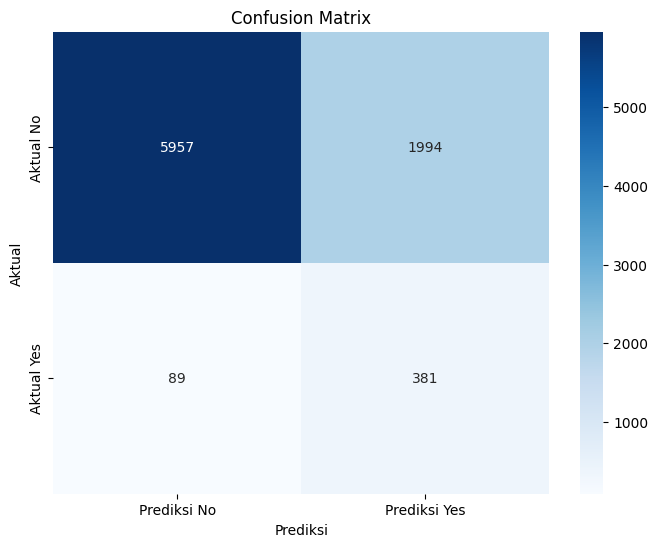


--- Membuat Visualisasi Pohon Keputusan ---


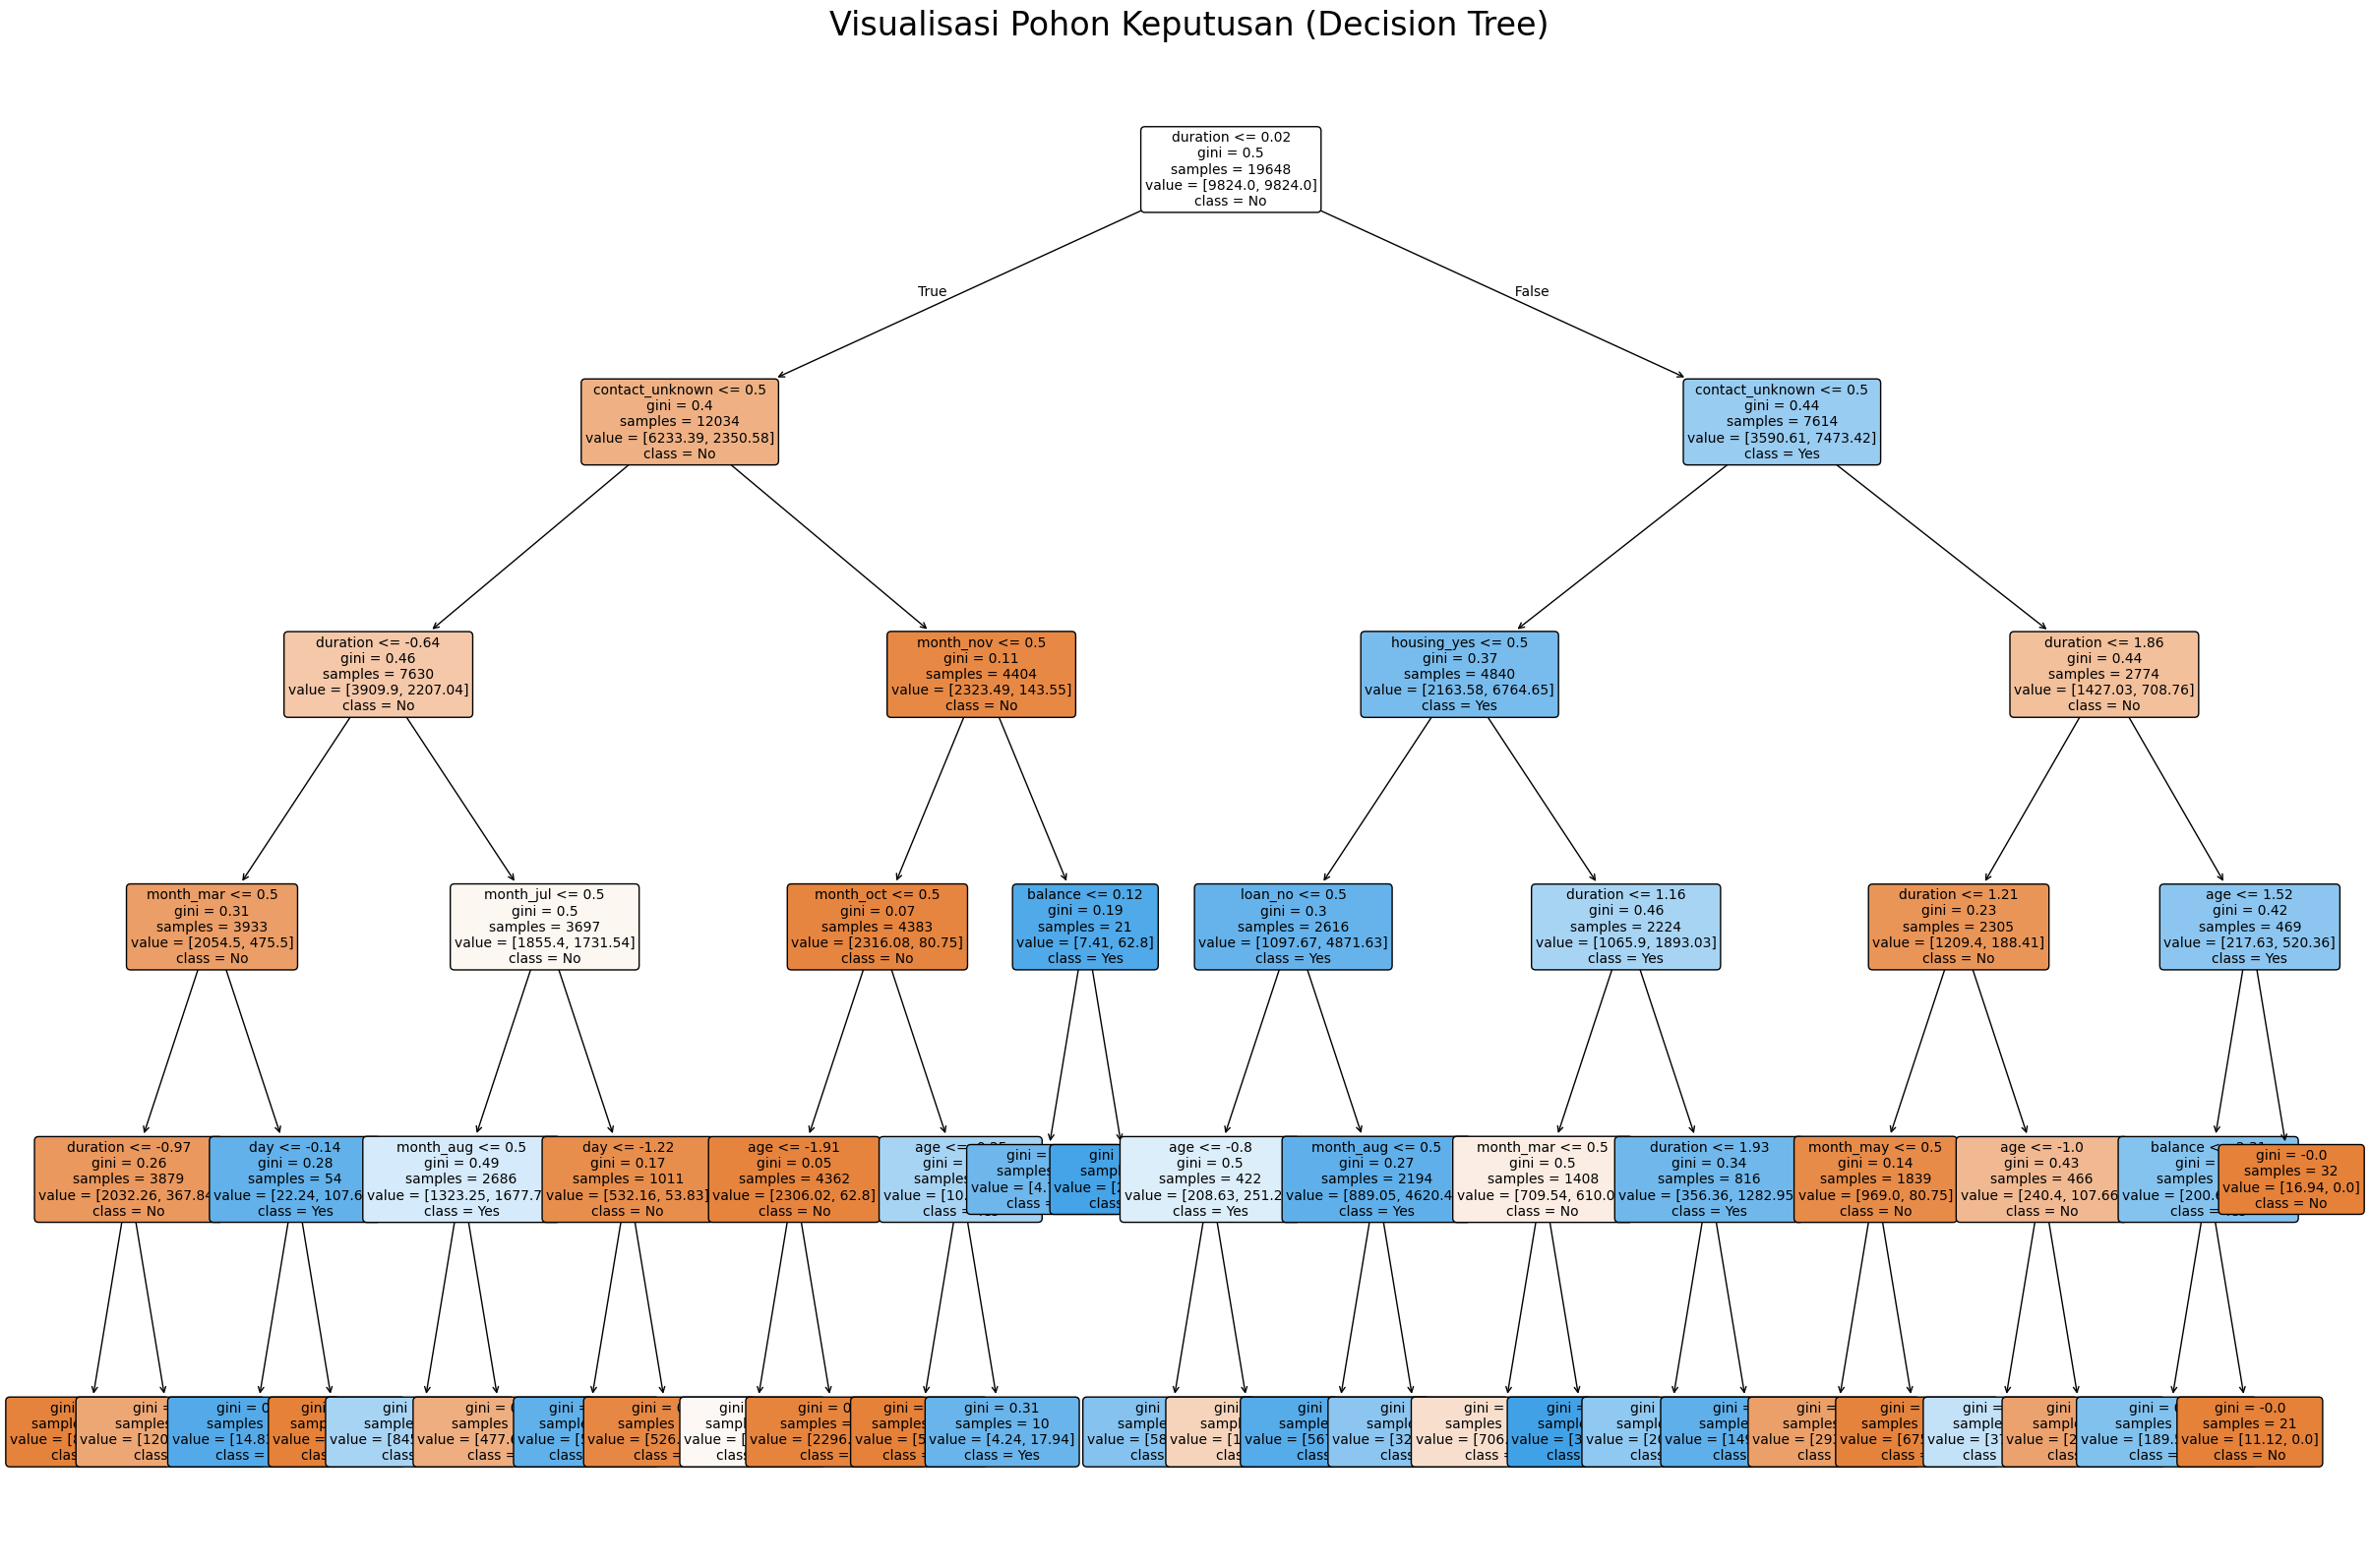

In [3]:
# --- TAHAP 1: PERSIAPAN DAN PREPROCESSING ---

# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns # <-- INI BARIS YANG DITAMBAHKAN UNTUK MEMPERBAIKI ERROR

print("Memulai proses: Memuat data, preprocessing, dan modeling...")

# 1. Muat Dataset yang Sudah Dibersihkan
try:
    df_clean = pd.read_csv('bank-full_no_outliers.csv', sep=';')
    print("\nDataset 'bank-full_no_outliers.csv' berhasil dimuat.")
    print(f"Bentuk data: {df_clean.shape}")
except FileNotFoundError:
    print("\nGAGAL: File 'bank-full_no_outliers.csv' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan kode untuk menghapus outlier dan menyimpannya.")
    exit()

# 2. Pra-pemrosesan Variabel Target (y)
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})
print("\nVariabel target 'y' telah diubah menjadi format biner (1/0).")

# 3. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop('y', axis=1)
y = df_clean['y']

# 4. Mengidentifikasi Tipe Kolom
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 5. Membuat Transformer untuk Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 6. Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("\nDataset telah dibagi: 70% data latih, 30% data uji.")

# 7. Menerapkan Preprocessing pada Data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Preprocessing (Scaling dan Encoding) selesai.")

# --- TAHAP 2: PEMODELAN DENGAN DECISION TREE ---

print("\n--- Memulai Pelatihan Model Decision Tree ---")

# 1. Membuat instance model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', min_samples_leaf=10, random_state=42)

# 2. Melatih model
dt_model.fit(X_train_processed, y_train)
print("Model Decision Tree berhasil dilatih.")

# --- TAHAP 3: EVALUASI MODEL ---

print("\n--- Memulai Evaluasi Model ---")

# 3. Membuat prediksi pada data uji
y_pred = dt_model.predict(X_test_processed)

# 4. Mengevaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))

# Bagian ini sekarang akan berjalan tanpa error
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6)) # Menambahkan ukuran figure agar heatmap lebih jelas
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi No', 'Prediksi Yes'], yticklabels=['Aktual No', 'Aktual Yes'])
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion Matrix')
plt.show()

# --- TAHAP 4: VISUALISASI POHON KEPUTUSAN ---

print("\n--- Membuat Visualisasi Pohon Keputusan ---")
# Mendapatkan nama fitur setelah one-hot encoding
try:
    feature_names = numerical_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
except AttributeError: # Fallback untuk versi scikit-learn yang lebih lama
    feature_names = numerical_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()


plt.figure(figsize=(30, 20)) # Ukuran disesuaikan agar lebih mudah dibaca
plot_tree(dt_model, 
          filled=True, 
          feature_names=feature_names,
          class_names=['No', 'Yes'],
          rounded=True,
          fontsize=10,
          proportion=False,
          precision=2)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)", fontsize=24)
plt.show()